# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 250
d = 10
ads_selected = []
num_of_1_rewards = [0] * d
num_of_0_rewards = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_random = 0
  for i in range(d):
    random_beta = random.betavariate(num_of_1_rewards[i] + 1, num_of_0_rewards[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    num_of_1_rewards[ad] = num_of_1_rewards[ad] + 1
  else:
    num_of_0_rewards[ad] = num_of_0_rewards[ad] + 1
  total_reward = total_reward + reward


## Visualising the results - Histogram

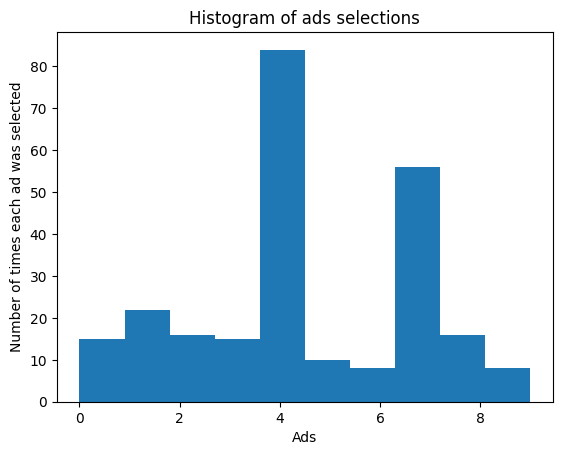

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()